## Part 1: Data preparation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
# load data, data taken from https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset
full_data = pd.read_csv('dataset.csv')
full_data.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
# parameters names and types
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [4]:
# search for nul values
full_data.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
# search for duplicates
full_data.drop(columns = ['Unnamed: 0'],axis = 1, inplace=True)
full_data.duplicated().sum()

450

We have plenty of entries, removing all duplicate and null entries is okay.

In [6]:
# remove duplicates and null rows
full_data.dropna(inplace=True)
full_data.drop_duplicates(inplace=True)

In [7]:
# removing unwanted columns
full_data.drop(columns=['track_id','artists','album_name','track_name'], inplace=True)
full_data.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [8]:
# types of genres
full_data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

### genre reduction
We combine similar genres to one

In [9]:
full_data['track_genre'] = full_data['track_genre'].replace(['cantopop', 'indie-pop', 'j-pop', 'k-pop', 'pop-film', 'power-pop',
                                                            'synth-pop', 'mandopop', 'mpb'], 'pop')

full_data['track_genre'] = full_data['track_genre'].replace(['honky-tonk'], 'country')

full_data['track_genre'] = full_data['track_genre'].replace(['psych-rock', 'punk-rock', 'rock-n-roll', 'rockabilly', 'alt-rock',
                                                            'black-metal', 'death-metal', 'grindcore','grunge', 'hard-rock',
                                                            'hardcore', 'heavy-metal', 'j-rock', 'metal', 'metalcore', 'punk'], 'rock')

full_data['track_genre'] = full_data['track_genre'].replace(['chicago-house', 'progressive-house', 'deep-house'], 'house')

full_data['track_genre'] = full_data['track_genre'].replace(['club', 'dancehall', 'detroit-techno', 'disco', 'dub', 'dubstep',
                                                            'edm', 'electro', 'groove', 'hardstyle', 'hip-hop', 'j-dance',
                                                            'minimal-techno', 'party', 'samba', 'salsa', 'tango', 'techno', 
                                                            'trance'], 'dance')

In [10]:
# types of genres
full_data['track_genre'].unique()

array(['acoustic', 'afrobeat', 'rock', 'alternative', 'ambient', 'anime',
       'bluegrass', 'blues', 'brazil', 'breakbeat', 'british', 'pop',
       'house', 'children', 'chill', 'classical', 'dance', 'comedy',
       'country', 'disney', 'drum-and-bass', 'electronic', 'emo', 'folk',
       'forro', 'french', 'funk', 'garage', 'german', 'gospel', 'goth',
       'guitar', 'happy', 'idm', 'indian', 'indie', 'industrial',
       'iranian', 'j-idol', 'jazz', 'kids', 'latin', 'latino', 'malay',
       'new-age', 'opera', 'pagode', 'piano', 'r-n-b', 'reggae',
       'reggaeton', 'romance', 'sad', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'study', 'swedish', 'trip-hop', 'turkish',
       'world-music'], dtype=object)

In [11]:
# number of genres
len(full_data['track_genre'].unique())

66

In [12]:
# encode 'explicit' and 'track genre' columns
from sklearn.preprocessing import LabelEncoder
full_data['explicit'] = LabelEncoder().fit_transform(full_data['explicit'])
full_data['track_genre'] = LabelEncoder().fit_transform(full_data['track_genre'])
full_data.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,0
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,0
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,0
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,0
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,0


In [13]:
from sklearn.model_selection import train_test_split
# divide label from data
X = full_data.drop(columns = ['track_genre'])
y = full_data.loc[:,'track_genre']
# one-hot encode y
from sklearn.preprocessing import OneHotEncoder
y = np.array(y).reshape(-1, 1)
y = OneHotEncoder(sparse = False).fit_transform(y)

X.shape

(113549, 15)

In [14]:
# preparing the features for RNN
# The LSTM layer requires a specific shape, we will transform X accordingly 
X = np.expand_dims(X, 2)

X.shape

(113549, 15, 1)

In [15]:

# train test split with shuffle
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
# split validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
X_val.shape

(18168, 15, 1)

In [17]:
# scaling the data to fit between [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# treat train set as all the knowledge we have and transform validation and test according to it
scaler.fit(X_train[:,:,0])
X_train[:,:,0] = scaler.transform(X_train[:,:,0])
X_val[:,:,0] = scaler.transform(X_val[:,:,0])
X_test[:,:,0] = scaler.transform(X_test[:,:,0])
X_train.max() # new maximal value

1.0

Data is now ready for learning

## Part 2: RNN
In the previous project we used Softmax and MLP to try and learn the data.
We managed to do so to a certain success, with 0.26 being the highest accuracy we managed to accomplish.

This time we will use more advanced models, such as RNN (Recursive Neural Network)

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
tf.random.set_seed(2)

In [19]:
model = keras.Sequential()
# first layer is dense layer
model.add(layers.Dense(250, input_shape=(15,1,)))
# second layer is the LSTM recursive layer
model.add(layers.LSTM(80, return_sequences = False))
# last layer is the softmax layer for classification
model.add(layers.Dense(66, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15, 250)           500       
_________________________________________________________________
lstm (LSTM)                  (None, 80)                105920    
_________________________________________________________________
dense_1 (Dense)              (None, 66)                5346      
Total params: 111,766
Trainable params: 111,766
Non-trainable params: 0
_________________________________________________________________


In [20]:
checkpoint_path = "reduced_rnn_training/cp.ckpt"


# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [21]:
# Compile and train the model.
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train,
                  y_train,
                  epochs=1000, 
                  batch_size=10000, 
                  validation_data=(X_val, y_val),
                  callbacks=[cp_callback])  # Pass callback to training

Epoch 1/1000
8/8 [==============================] - 41s 4s/step - loss: 4.0653 - accuracy: 0.1531 - val_loss: 3.8057 - val_accuracy: 0.1794

Epoch 00001: saving model to reduced_rnn_training\cp.ckpt
Epoch 2/1000
8/8 [==============================] - 24s 3s/step - loss: 3.6725 - accuracy: 0.1752 - val_loss: 3.5841 - val_accuracy: 0.1794

Epoch 00002: saving model to reduced_rnn_training\cp.ckpt
Epoch 3/1000
8/8 [==============================] - 24s 3s/step - loss: 3.5582 - accuracy: 0.1586 - val_loss: 3.5415 - val_accuracy: 0.1498

Epoch 00003: saving model to reduced_rnn_training\cp.ckpt
Epoch 4/1000
8/8 [==============================] - 25s 3s/step - loss: 3.5329 - accuracy: 0.1644 - val_loss: 3.5309 - val_accuracy: 0.1794

Epoch 00004: saving model to reduced_rnn_training\cp.ckpt
Epoch 5/1000
8/8 [==============================] - 25s 3s/step - loss: 3.5279 - accuracy: 0.1752 - val_loss: 3.5273 - val_accuracy: 0.1794

Epoch 00005: saving model to reduced_rnn_training\cp.ckpt
Epoch

8/8 [==============================] - 24s 3s/step - loss: 3.0278 - accuracy: 0.2341 - val_loss: 3.0139 - val_accuracy: 0.2380

Epoch 00042: saving model to reduced_rnn_training\cp.ckpt
Epoch 43/1000
8/8 [==============================] - 23s 3s/step - loss: 3.0069 - accuracy: 0.2383 - val_loss: 2.9927 - val_accuracy: 0.2410

Epoch 00043: saving model to reduced_rnn_training\cp.ckpt
Epoch 44/1000
8/8 [==============================] - 24s 3s/step - loss: 2.9817 - accuracy: 0.2420 - val_loss: 2.9730 - val_accuracy: 0.2436

Epoch 00044: saving model to reduced_rnn_training\cp.ckpt
Epoch 45/1000
8/8 [==============================] - 24s 3s/step - loss: 2.9630 - accuracy: 0.2442 - val_loss: 2.9554 - val_accuracy: 0.2464

Epoch 00045: saving model to reduced_rnn_training\cp.ckpt
Epoch 46/1000
8/8 [==============================] - 23s 3s/step - loss: 2.9435 - accuracy: 0.2465 - val_loss: 2.9353 - val_accuracy: 0.2501

Epoch 00046: saving model to reduced_rnn_training\cp.ckpt
Epoch 47/1000


8/8 [==============================] - 24s 3s/step - loss: 2.5374 - accuracy: 0.3159 - val_loss: 2.5502 - val_accuracy: 0.3127

Epoch 00083: saving model to reduced_rnn_training\cp.ckpt
Epoch 84/1000
8/8 [==============================] - 25s 3s/step - loss: 2.5333 - accuracy: 0.3159 - val_loss: 2.5624 - val_accuracy: 0.3054

Epoch 00084: saving model to reduced_rnn_training\cp.ckpt
Epoch 85/1000
8/8 [==============================] - 24s 3s/step - loss: 2.5388 - accuracy: 0.3127 - val_loss: 2.5402 - val_accuracy: 0.3120

Epoch 00085: saving model to reduced_rnn_training\cp.ckpt
Epoch 86/1000
8/8 [==============================] - 24s 3s/step - loss: 2.5320 - accuracy: 0.3150 - val_loss: 2.5582 - val_accuracy: 0.3076

Epoch 00086: saving model to reduced_rnn_training\cp.ckpt
Epoch 87/1000
8/8 [==============================] - 24s 3s/step - loss: 2.5331 - accuracy: 0.3132 - val_loss: 2.5390 - val_accuracy: 0.3092

Epoch 00087: saving model to reduced_rnn_training\cp.ckpt
Epoch 88/1000


8/8 [==============================] - 24s 3s/step - loss: 2.4114 - accuracy: 0.3373 - val_loss: 2.4444 - val_accuracy: 0.3325

Epoch 00124: saving model to reduced_rnn_training\cp.ckpt
Epoch 125/1000
8/8 [==============================] - 24s 3s/step - loss: 2.4148 - accuracy: 0.3366 - val_loss: 2.4373 - val_accuracy: 0.3336

Epoch 00125: saving model to reduced_rnn_training\cp.ckpt
Epoch 126/1000
8/8 [==============================] - 23s 3s/step - loss: 2.4089 - accuracy: 0.3367 - val_loss: 2.4253 - val_accuracy: 0.3329

Epoch 00126: saving model to reduced_rnn_training\cp.ckpt
Epoch 127/1000
8/8 [==============================] - 23s 3s/step - loss: 2.4026 - accuracy: 0.3396 - val_loss: 2.4356 - val_accuracy: 0.3278

Epoch 00127: saving model to reduced_rnn_training\cp.ckpt
Epoch 128/1000
8/8 [==============================] - 24s 3s/step - loss: 2.4006 - accuracy: 0.3390 - val_loss: 2.4274 - val_accuracy: 0.3323

Epoch 00128: saving model to reduced_rnn_training\cp.ckpt
Epoch 129/

8/8 [==============================] - 23s 3s/step - loss: 2.3413 - accuracy: 0.3501 - val_loss: 2.3664 - val_accuracy: 0.3440

Epoch 00165: saving model to reduced_rnn_training\cp.ckpt
Epoch 166/1000
8/8 [==============================] - 23s 3s/step - loss: 2.3367 - accuracy: 0.3518 - val_loss: 2.3640 - val_accuracy: 0.3465

Epoch 00166: saving model to reduced_rnn_training\cp.ckpt
Epoch 167/1000
8/8 [==============================] - 23s 3s/step - loss: 2.3338 - accuracy: 0.3524 - val_loss: 2.3741 - val_accuracy: 0.3415

Epoch 00167: saving model to reduced_rnn_training\cp.ckpt
Epoch 168/1000
8/8 [==============================] - 23s 3s/step - loss: 2.3355 - accuracy: 0.3519 - val_loss: 2.3792 - val_accuracy: 0.3451

Epoch 00168: saving model to reduced_rnn_training\cp.ckpt
Epoch 169/1000
8/8 [==============================] - 23s 3s/step - loss: 2.3385 - accuracy: 0.3501 - val_loss: 2.3636 - val_accuracy: 0.3438

Epoch 00169: saving model to reduced_rnn_training\cp.ckpt
Epoch 170/

8/8 [==============================] - 23s 3s/step - loss: 2.3012 - accuracy: 0.3589 - val_loss: 2.3303 - val_accuracy: 0.3530

Epoch 00206: saving model to reduced_rnn_training\cp.ckpt
Epoch 207/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2922 - accuracy: 0.3599 - val_loss: 2.3226 - val_accuracy: 0.3549

Epoch 00207: saving model to reduced_rnn_training\cp.ckpt
Epoch 208/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2841 - accuracy: 0.3637 - val_loss: 2.3184 - val_accuracy: 0.3539

Epoch 00208: saving model to reduced_rnn_training\cp.ckpt
Epoch 209/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2832 - accuracy: 0.3617 - val_loss: 2.3161 - val_accuracy: 0.3542

Epoch 00209: saving model to reduced_rnn_training\cp.ckpt
Epoch 210/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2819 - accuracy: 0.3625 - val_loss: 2.3289 - val_accuracy: 0.3549

Epoch 00210: saving model to reduced_rnn_training\cp.ckpt
Epoch 211/

8/8 [==============================] - 25s 3s/step - loss: 2.2560 - accuracy: 0.3692 - val_loss: 2.2984 - val_accuracy: 0.3566

Epoch 00247: saving model to reduced_rnn_training\cp.ckpt
Epoch 248/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2492 - accuracy: 0.3687 - val_loss: 2.2862 - val_accuracy: 0.3615

Epoch 00248: saving model to reduced_rnn_training\cp.ckpt
Epoch 249/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2470 - accuracy: 0.3715 - val_loss: 2.2857 - val_accuracy: 0.3622

Epoch 00249: saving model to reduced_rnn_training\cp.ckpt
Epoch 250/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2450 - accuracy: 0.3719 - val_loss: 2.2869 - val_accuracy: 0.3612

Epoch 00250: saving model to reduced_rnn_training\cp.ckpt
Epoch 251/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2412 - accuracy: 0.3716 - val_loss: 2.2785 - val_accuracy: 0.3622

Epoch 00251: saving model to reduced_rnn_training\cp.ckpt
Epoch 252/

8/8 [==============================] - 24s 3s/step - loss: 2.2276 - accuracy: 0.3760 - val_loss: 2.2694 - val_accuracy: 0.3662

Epoch 00288: saving model to reduced_rnn_training\cp.ckpt
Epoch 289/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2147 - accuracy: 0.3792 - val_loss: 2.2544 - val_accuracy: 0.3696

Epoch 00289: saving model to reduced_rnn_training\cp.ckpt
Epoch 290/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2113 - accuracy: 0.3794 - val_loss: 2.2508 - val_accuracy: 0.3711

Epoch 00290: saving model to reduced_rnn_training\cp.ckpt
Epoch 291/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2081 - accuracy: 0.3801 - val_loss: 2.2521 - val_accuracy: 0.3696

Epoch 00291: saving model to reduced_rnn_training\cp.ckpt
Epoch 292/1000
8/8 [==============================] - 23s 3s/step - loss: 2.2099 - accuracy: 0.3792 - val_loss: 2.2693 - val_accuracy: 0.3649

Epoch 00292: saving model to reduced_rnn_training\cp.ckpt
Epoch 293/

8/8 [==============================] - 23s 3s/step - loss: 2.1850 - accuracy: 0.3863 - val_loss: 2.2387 - val_accuracy: 0.3767

Epoch 00329: saving model to reduced_rnn_training\cp.ckpt
Epoch 330/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1870 - accuracy: 0.3857 - val_loss: 2.2337 - val_accuracy: 0.3780

Epoch 00330: saving model to reduced_rnn_training\cp.ckpt
Epoch 331/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1920 - accuracy: 0.3843 - val_loss: 2.2274 - val_accuracy: 0.3765

Epoch 00331: saving model to reduced_rnn_training\cp.ckpt
Epoch 332/1000
8/8 [==============================] - 24s 3s/step - loss: 2.2003 - accuracy: 0.3817 - val_loss: 2.2450 - val_accuracy: 0.3692

Epoch 00332: saving model to reduced_rnn_training\cp.ckpt
Epoch 333/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1913 - accuracy: 0.3825 - val_loss: 2.2322 - val_accuracy: 0.3743

Epoch 00333: saving model to reduced_rnn_training\cp.ckpt
Epoch 334/

8/8 [==============================] - 24s 3s/step - loss: 2.1624 - accuracy: 0.3898 - val_loss: 2.2074 - val_accuracy: 0.3827

Epoch 00370: saving model to reduced_rnn_training\cp.ckpt
Epoch 371/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1665 - accuracy: 0.3895 - val_loss: 2.2069 - val_accuracy: 0.3840

Epoch 00371: saving model to reduced_rnn_training\cp.ckpt
Epoch 372/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1630 - accuracy: 0.3902 - val_loss: 2.2107 - val_accuracy: 0.3827

Epoch 00372: saving model to reduced_rnn_training\cp.ckpt
Epoch 373/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1839 - accuracy: 0.3842 - val_loss: 2.2143 - val_accuracy: 0.3816

Epoch 00373: saving model to reduced_rnn_training\cp.ckpt
Epoch 374/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1700 - accuracy: 0.3879 - val_loss: 2.2183 - val_accuracy: 0.3778

Epoch 00374: saving model to reduced_rnn_training\cp.ckpt
Epoch 375/

8/8 [==============================] - 24s 3s/step - loss: 2.1597 - accuracy: 0.3901 - val_loss: 2.2118 - val_accuracy: 0.3813

Epoch 00411: saving model to reduced_rnn_training\cp.ckpt
Epoch 412/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1584 - accuracy: 0.3901 - val_loss: 2.2054 - val_accuracy: 0.3825

Epoch 00412: saving model to reduced_rnn_training\cp.ckpt
Epoch 413/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1455 - accuracy: 0.3929 - val_loss: 2.1946 - val_accuracy: 0.3853

Epoch 00413: saving model to reduced_rnn_training\cp.ckpt
Epoch 414/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1405 - accuracy: 0.3947 - val_loss: 2.1873 - val_accuracy: 0.3874

Epoch 00414: saving model to reduced_rnn_training\cp.ckpt
Epoch 415/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1363 - accuracy: 0.3956 - val_loss: 2.2172 - val_accuracy: 0.3777

Epoch 00415: saving model to reduced_rnn_training\cp.ckpt
Epoch 416/

Epoch 452/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1482 - accuracy: 0.3919 - val_loss: 2.1882 - val_accuracy: 0.3879

Epoch 00452: saving model to reduced_rnn_training\cp.ckpt
Epoch 453/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1332 - accuracy: 0.3958 - val_loss: 2.1835 - val_accuracy: 0.3890

Epoch 00453: saving model to reduced_rnn_training\cp.ckpt
Epoch 454/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1288 - accuracy: 0.3991 - val_loss: 2.2042 - val_accuracy: 0.3819

Epoch 00454: saving model to reduced_rnn_training\cp.ckpt
Epoch 455/1000
8/8 [==============================] - 24s 3s/step - loss: 2.1277 - accuracy: 0.3965 - val_loss: 2.1861 - val_accuracy: 0.3907

Epoch 00455: saving model to reduced_rnn_training\cp.ckpt
Epoch 456/1000
8/8 [==============================] - 23s 3s/step - loss: 2.1182 - accuracy: 0.3998 - val_loss: 2.1789 - val_accuracy: 0.3871

Epoch 00456: saving model to reduced_rnn_training\cp.

8/8 [==============================] - 24s 3s/step - loss: 2.0996 - accuracy: 0.4051 - val_loss: 2.1622 - val_accuracy: 0.3962

Epoch 00493: saving model to reduced_rnn_training\cp.ckpt
Epoch 494/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0992 - accuracy: 0.4047 - val_loss: 2.1633 - val_accuracy: 0.3948

Epoch 00494: saving model to reduced_rnn_training\cp.ckpt
Epoch 495/1000
8/8 [==============================] - 25s 3s/step - loss: 2.0993 - accuracy: 0.4068 - val_loss: 2.1609 - val_accuracy: 0.3943

Epoch 00495: saving model to reduced_rnn_training\cp.ckpt
Epoch 496/1000
8/8 [==============================] - 25s 3s/step - loss: 2.1030 - accuracy: 0.4041 - val_loss: 2.1833 - val_accuracy: 0.3884

Epoch 00496: saving model to reduced_rnn_training\cp.ckpt
Epoch 497/1000
8/8 [==============================] - 25s 3s/step - loss: 2.1095 - accuracy: 0.4033 - val_loss: 2.1621 - val_accuracy: 0.3937

Epoch 00497: saving model to reduced_rnn_training\cp.ckpt
Epoch 498/

8/8 [==============================] - 26s 3s/step - loss: 2.0999 - accuracy: 0.4041 - val_loss: 2.1676 - val_accuracy: 0.3895

Epoch 00534: saving model to reduced_rnn_training\cp.ckpt
Epoch 535/1000
8/8 [==============================] - 25s 3s/step - loss: 2.0901 - accuracy: 0.4073 - val_loss: 2.1542 - val_accuracy: 0.3943

Epoch 00535: saving model to reduced_rnn_training\cp.ckpt
Epoch 536/1000
8/8 [==============================] - 26s 3s/step - loss: 2.0851 - accuracy: 0.4080 - val_loss: 2.1537 - val_accuracy: 0.3968

Epoch 00536: saving model to reduced_rnn_training\cp.ckpt
Epoch 537/1000
8/8 [==============================] - 26s 3s/step - loss: 2.0868 - accuracy: 0.4081 - val_loss: 2.1709 - val_accuracy: 0.3888

Epoch 00537: saving model to reduced_rnn_training\cp.ckpt
Epoch 538/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0940 - accuracy: 0.4056 - val_loss: 2.1603 - val_accuracy: 0.3941

Epoch 00538: saving model to reduced_rnn_training\cp.ckpt
Epoch 539/

Epoch 575/1000
8/8 [==============================] - 28s 4s/step - loss: 2.0705 - accuracy: 0.4124 - val_loss: 2.1560 - val_accuracy: 0.3959

Epoch 00575: saving model to reduced_rnn_training\cp.ckpt
Epoch 576/1000
8/8 [==============================] - 28s 4s/step - loss: 2.0775 - accuracy: 0.4099 - val_loss: 2.1390 - val_accuracy: 0.3995

Epoch 00576: saving model to reduced_rnn_training\cp.ckpt
Epoch 577/1000
8/8 [==============================] - 30s 4s/step - loss: 2.0698 - accuracy: 0.4116 - val_loss: 2.1497 - val_accuracy: 0.3969

Epoch 00577: saving model to reduced_rnn_training\cp.ckpt
Epoch 578/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0754 - accuracy: 0.4107 - val_loss: 2.1427 - val_accuracy: 0.3967

Epoch 00578: saving model to reduced_rnn_training\cp.ckpt
Epoch 579/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0719 - accuracy: 0.4100 - val_loss: 2.1429 - val_accuracy: 0.4015

Epoch 00579: saving model to reduced_rnn_training\cp.

Epoch 616/1000
8/8 [==============================] - 25s 3s/step - loss: 2.0602 - accuracy: 0.4138 - val_loss: 2.1387 - val_accuracy: 0.4003

Epoch 00616: saving model to reduced_rnn_training\cp.ckpt
Epoch 617/1000
8/8 [==============================] - 28s 3s/step - loss: 2.0612 - accuracy: 0.4131 - val_loss: 2.1334 - val_accuracy: 0.4018

Epoch 00617: saving model to reduced_rnn_training\cp.ckpt
Epoch 618/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0592 - accuracy: 0.4131 - val_loss: 2.1262 - val_accuracy: 0.4041

Epoch 00618: saving model to reduced_rnn_training\cp.ckpt
Epoch 619/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0577 - accuracy: 0.4133 - val_loss: 2.1376 - val_accuracy: 0.3997

Epoch 00619: saving model to reduced_rnn_training\cp.ckpt
Epoch 620/1000
8/8 [==============================] - 27s 3s/step - loss: 2.0618 - accuracy: 0.4135 - val_loss: 2.1303 - val_accuracy: 0.4006

Epoch 00620: saving model to reduced_rnn_training\cp.

Epoch 657/1000
8/8 [==============================] - 35s 4s/step - loss: 2.0448 - accuracy: 0.4175 - val_loss: 2.1238 - val_accuracy: 0.4038

Epoch 00657: saving model to reduced_rnn_training\cp.ckpt
Epoch 658/1000
8/8 [==============================] - 34s 4s/step - loss: 2.0468 - accuracy: 0.4166 - val_loss: 2.1269 - val_accuracy: 0.4039

Epoch 00658: saving model to reduced_rnn_training\cp.ckpt
Epoch 659/1000
8/8 [==============================] - 31s 4s/step - loss: 2.0471 - accuracy: 0.4151 - val_loss: 2.1205 - val_accuracy: 0.4037

Epoch 00659: saving model to reduced_rnn_training\cp.ckpt
Epoch 660/1000
8/8 [==============================] - 28s 4s/step - loss: 2.0465 - accuracy: 0.4164 - val_loss: 2.1205 - val_accuracy: 0.4056

Epoch 00660: saving model to reduced_rnn_training\cp.ckpt
Epoch 661/1000
8/8 [==============================] - 31s 4s/step - loss: 2.0448 - accuracy: 0.4162 - val_loss: 2.1275 - val_accuracy: 0.4008

Epoch 00661: saving model to reduced_rnn_training\cp.

Epoch 698/1000
8/8 [==============================] - 30s 4s/step - loss: 2.0353 - accuracy: 0.4185 - val_loss: 2.1131 - val_accuracy: 0.4060

Epoch 00698: saving model to reduced_rnn_training\cp.ckpt
Epoch 699/1000
8/8 [==============================] - 35s 4s/step - loss: 2.0352 - accuracy: 0.4191 - val_loss: 2.1200 - val_accuracy: 0.4029

Epoch 00699: saving model to reduced_rnn_training\cp.ckpt
Epoch 700/1000
8/8 [==============================] - 32s 4s/step - loss: 2.0391 - accuracy: 0.4186 - val_loss: 2.1193 - val_accuracy: 0.4043

Epoch 00700: saving model to reduced_rnn_training\cp.ckpt
Epoch 701/1000
8/8 [==============================] - 32s 4s/step - loss: 2.0380 - accuracy: 0.4176 - val_loss: 2.1240 - val_accuracy: 0.4055

Epoch 00701: saving model to reduced_rnn_training\cp.ckpt
Epoch 702/1000
8/8 [==============================] - 33s 4s/step - loss: 2.0396 - accuracy: 0.4178 - val_loss: 2.1194 - val_accuracy: 0.4039

Epoch 00702: saving model to reduced_rnn_training\cp.

Epoch 739/1000
8/8 [==============================] - 25s 3s/step - loss: 2.0265 - accuracy: 0.4208 - val_loss: 2.1109 - val_accuracy: 0.4064

Epoch 00739: saving model to reduced_rnn_training\cp.ckpt
Epoch 740/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0266 - accuracy: 0.4201 - val_loss: 2.1159 - val_accuracy: 0.4038

Epoch 00740: saving model to reduced_rnn_training\cp.ckpt
Epoch 741/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0285 - accuracy: 0.4205 - val_loss: 2.1127 - val_accuracy: 0.4076

Epoch 00741: saving model to reduced_rnn_training\cp.ckpt
Epoch 742/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0263 - accuracy: 0.4205 - val_loss: 2.1195 - val_accuracy: 0.4039

Epoch 00742: saving model to reduced_rnn_training\cp.ckpt
Epoch 743/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0320 - accuracy: 0.4189 - val_loss: 2.1273 - val_accuracy: 0.4005

Epoch 00743: saving model to reduced_rnn_training\cp.

8/8 [==============================] - 24s 3s/step - loss: 2.0212 - accuracy: 0.4220 - val_loss: 2.1108 - val_accuracy: 0.4060

Epoch 00780: saving model to reduced_rnn_training\cp.ckpt
Epoch 781/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0285 - accuracy: 0.4218 - val_loss: 2.1127 - val_accuracy: 0.4035

Epoch 00781: saving model to reduced_rnn_training\cp.ckpt
Epoch 782/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0226 - accuracy: 0.4222 - val_loss: 2.1081 - val_accuracy: 0.4071

Epoch 00782: saving model to reduced_rnn_training\cp.ckpt
Epoch 783/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0151 - accuracy: 0.4233 - val_loss: 2.1030 - val_accuracy: 0.4063

Epoch 00783: saving model to reduced_rnn_training\cp.ckpt
Epoch 784/1000
8/8 [==============================] - 24s 3s/step - loss: 2.0153 - accuracy: 0.4230 - val_loss: 2.1141 - val_accuracy: 0.4053

Epoch 00784: saving model to reduced_rnn_training\cp.ckpt
Epoch 785/

8/8 [==============================] - 21s 3s/step - loss: 2.0100 - accuracy: 0.4232 - val_loss: 2.1037 - val_accuracy: 0.4108

Epoch 00821: saving model to reduced_rnn_training\cp.ckpt
Epoch 822/1000
8/8 [==============================] - 22s 3s/step - loss: 2.0099 - accuracy: 0.4231 - val_loss: 2.1041 - val_accuracy: 0.4084

Epoch 00822: saving model to reduced_rnn_training\cp.ckpt
Epoch 823/1000
8/8 [==============================] - 21s 3s/step - loss: 2.0130 - accuracy: 0.4239 - val_loss: 2.1070 - val_accuracy: 0.4060

Epoch 00823: saving model to reduced_rnn_training\cp.ckpt
Epoch 824/1000
8/8 [==============================] - 21s 3s/step - loss: 2.0080 - accuracy: 0.4246 - val_loss: 2.0965 - val_accuracy: 0.4079

Epoch 00824: saving model to reduced_rnn_training\cp.ckpt
Epoch 825/1000
8/8 [==============================] - 22s 3s/step - loss: 2.0024 - accuracy: 0.4255 - val_loss: 2.0926 - val_accuracy: 0.4115

Epoch 00825: saving model to reduced_rnn_training\cp.ckpt
Epoch 826/

8/8 [==============================] - 22s 3s/step - loss: 2.0008 - accuracy: 0.4263 - val_loss: 2.0922 - val_accuracy: 0.4104

Epoch 00862: saving model to reduced_rnn_training\cp.ckpt
Epoch 863/1000
8/8 [==============================] - 22s 3s/step - loss: 1.9975 - accuracy: 0.4265 - val_loss: 2.1013 - val_accuracy: 0.4094

Epoch 00863: saving model to reduced_rnn_training\cp.ckpt
Epoch 864/1000
8/8 [==============================] - 23s 3s/step - loss: 2.0086 - accuracy: 0.4240 - val_loss: 2.1137 - val_accuracy: 0.4062

Epoch 00864: saving model to reduced_rnn_training\cp.ckpt
Epoch 865/1000
8/8 [==============================] - 21s 3s/step - loss: 2.0047 - accuracy: 0.4246 - val_loss: 2.1161 - val_accuracy: 0.4041

Epoch 00865: saving model to reduced_rnn_training\cp.ckpt
Epoch 866/1000
8/8 [==============================] - 22s 3s/step - loss: 2.0050 - accuracy: 0.4257 - val_loss: 2.0972 - val_accuracy: 0.4084

Epoch 00866: saving model to reduced_rnn_training\cp.ckpt
Epoch 867/

8/8 [==============================] - 22s 3s/step - loss: 1.9849 - accuracy: 0.4301 - val_loss: 2.0861 - val_accuracy: 0.4112

Epoch 00903: saving model to reduced_rnn_training\cp.ckpt
Epoch 904/1000
8/8 [==============================] - 22s 3s/step - loss: 1.9840 - accuracy: 0.4307 - val_loss: 2.0845 - val_accuracy: 0.4109

Epoch 00904: saving model to reduced_rnn_training\cp.ckpt
Epoch 905/1000
8/8 [==============================] - 22s 3s/step - loss: 1.9858 - accuracy: 0.4295 - val_loss: 2.0905 - val_accuracy: 0.4110

Epoch 00905: saving model to reduced_rnn_training\cp.ckpt
Epoch 906/1000
8/8 [==============================] - 23s 3s/step - loss: 1.9876 - accuracy: 0.4294 - val_loss: 2.0907 - val_accuracy: 0.4104

Epoch 00906: saving model to reduced_rnn_training\cp.ckpt
Epoch 907/1000
8/8 [==============================] - 22s 3s/step - loss: 1.9878 - accuracy: 0.4291 - val_loss: 2.0929 - val_accuracy: 0.4097

Epoch 00907: saving model to reduced_rnn_training\cp.ckpt
Epoch 908/

8/8 [==============================] - 25s 3s/step - loss: 1.9796 - accuracy: 0.4321 - val_loss: 2.0815 - val_accuracy: 0.4124

Epoch 00944: saving model to reduced_rnn_training\cp.ckpt
Epoch 945/1000
8/8 [==============================] - 25s 3s/step - loss: 1.9808 - accuracy: 0.4301 - val_loss: 2.0814 - val_accuracy: 0.4146

Epoch 00945: saving model to reduced_rnn_training\cp.ckpt
Epoch 946/1000
8/8 [==============================] - 26s 3s/step - loss: 1.9799 - accuracy: 0.4308 - val_loss: 2.0894 - val_accuracy: 0.4126

Epoch 00946: saving model to reduced_rnn_training\cp.ckpt
Epoch 947/1000
8/8 [==============================] - 25s 3s/step - loss: 1.9818 - accuracy: 0.4313 - val_loss: 2.0871 - val_accuracy: 0.4131

Epoch 00947: saving model to reduced_rnn_training\cp.ckpt
Epoch 948/1000
8/8 [==============================] - 25s 3s/step - loss: 1.9818 - accuracy: 0.4300 - val_loss: 2.0835 - val_accuracy: 0.4115

Epoch 00948: saving model to reduced_rnn_training\cp.ckpt
Epoch 949/

8/8 [==============================] - 23s 3s/step - loss: 1.9788 - accuracy: 0.4304 - val_loss: 2.0879 - val_accuracy: 0.4103

Epoch 00985: saving model to reduced_rnn_training\cp.ckpt
Epoch 986/1000
8/8 [==============================] - 23s 3s/step - loss: 1.9763 - accuracy: 0.4317 - val_loss: 2.0871 - val_accuracy: 0.4098

Epoch 00986: saving model to reduced_rnn_training\cp.ckpt
Epoch 987/1000
8/8 [==============================] - 24s 3s/step - loss: 1.9732 - accuracy: 0.4325 - val_loss: 2.0778 - val_accuracy: 0.4157

Epoch 00987: saving model to reduced_rnn_training\cp.ckpt
Epoch 988/1000
8/8 [==============================] - 23s 3s/step - loss: 1.9703 - accuracy: 0.4326 - val_loss: 2.0798 - val_accuracy: 0.4120

Epoch 00988: saving model to reduced_rnn_training\cp.ckpt
Epoch 989/1000
8/8 [==============================] - 23s 3s/step - loss: 1.9699 - accuracy: 0.4337 - val_loss: 2.0767 - val_accuracy: 0.4136

Epoch 00989: saving model to reduced_rnn_training\cp.ckpt
Epoch 990/

plot learning curves

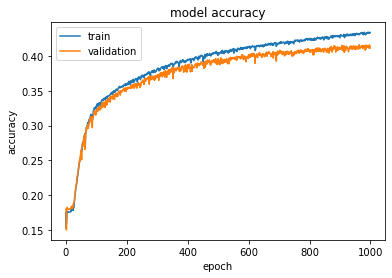

In [22]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

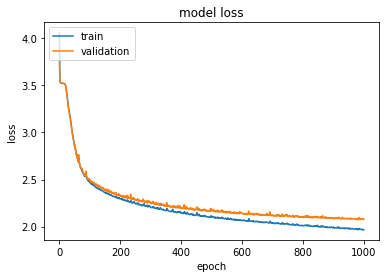

In [23]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Final Results

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('test loss:', test_loss)
print('test accuracy:', test_accuracy)

710/710 [==============================] - 15s 21ms/step - loss: 2.0884 - accuracy: 0.4079
test loss: 2.0883724689483643
test accuracy: 0.4078820049762726


In [25]:
#predictions
y_pred = model.predict(X_test)

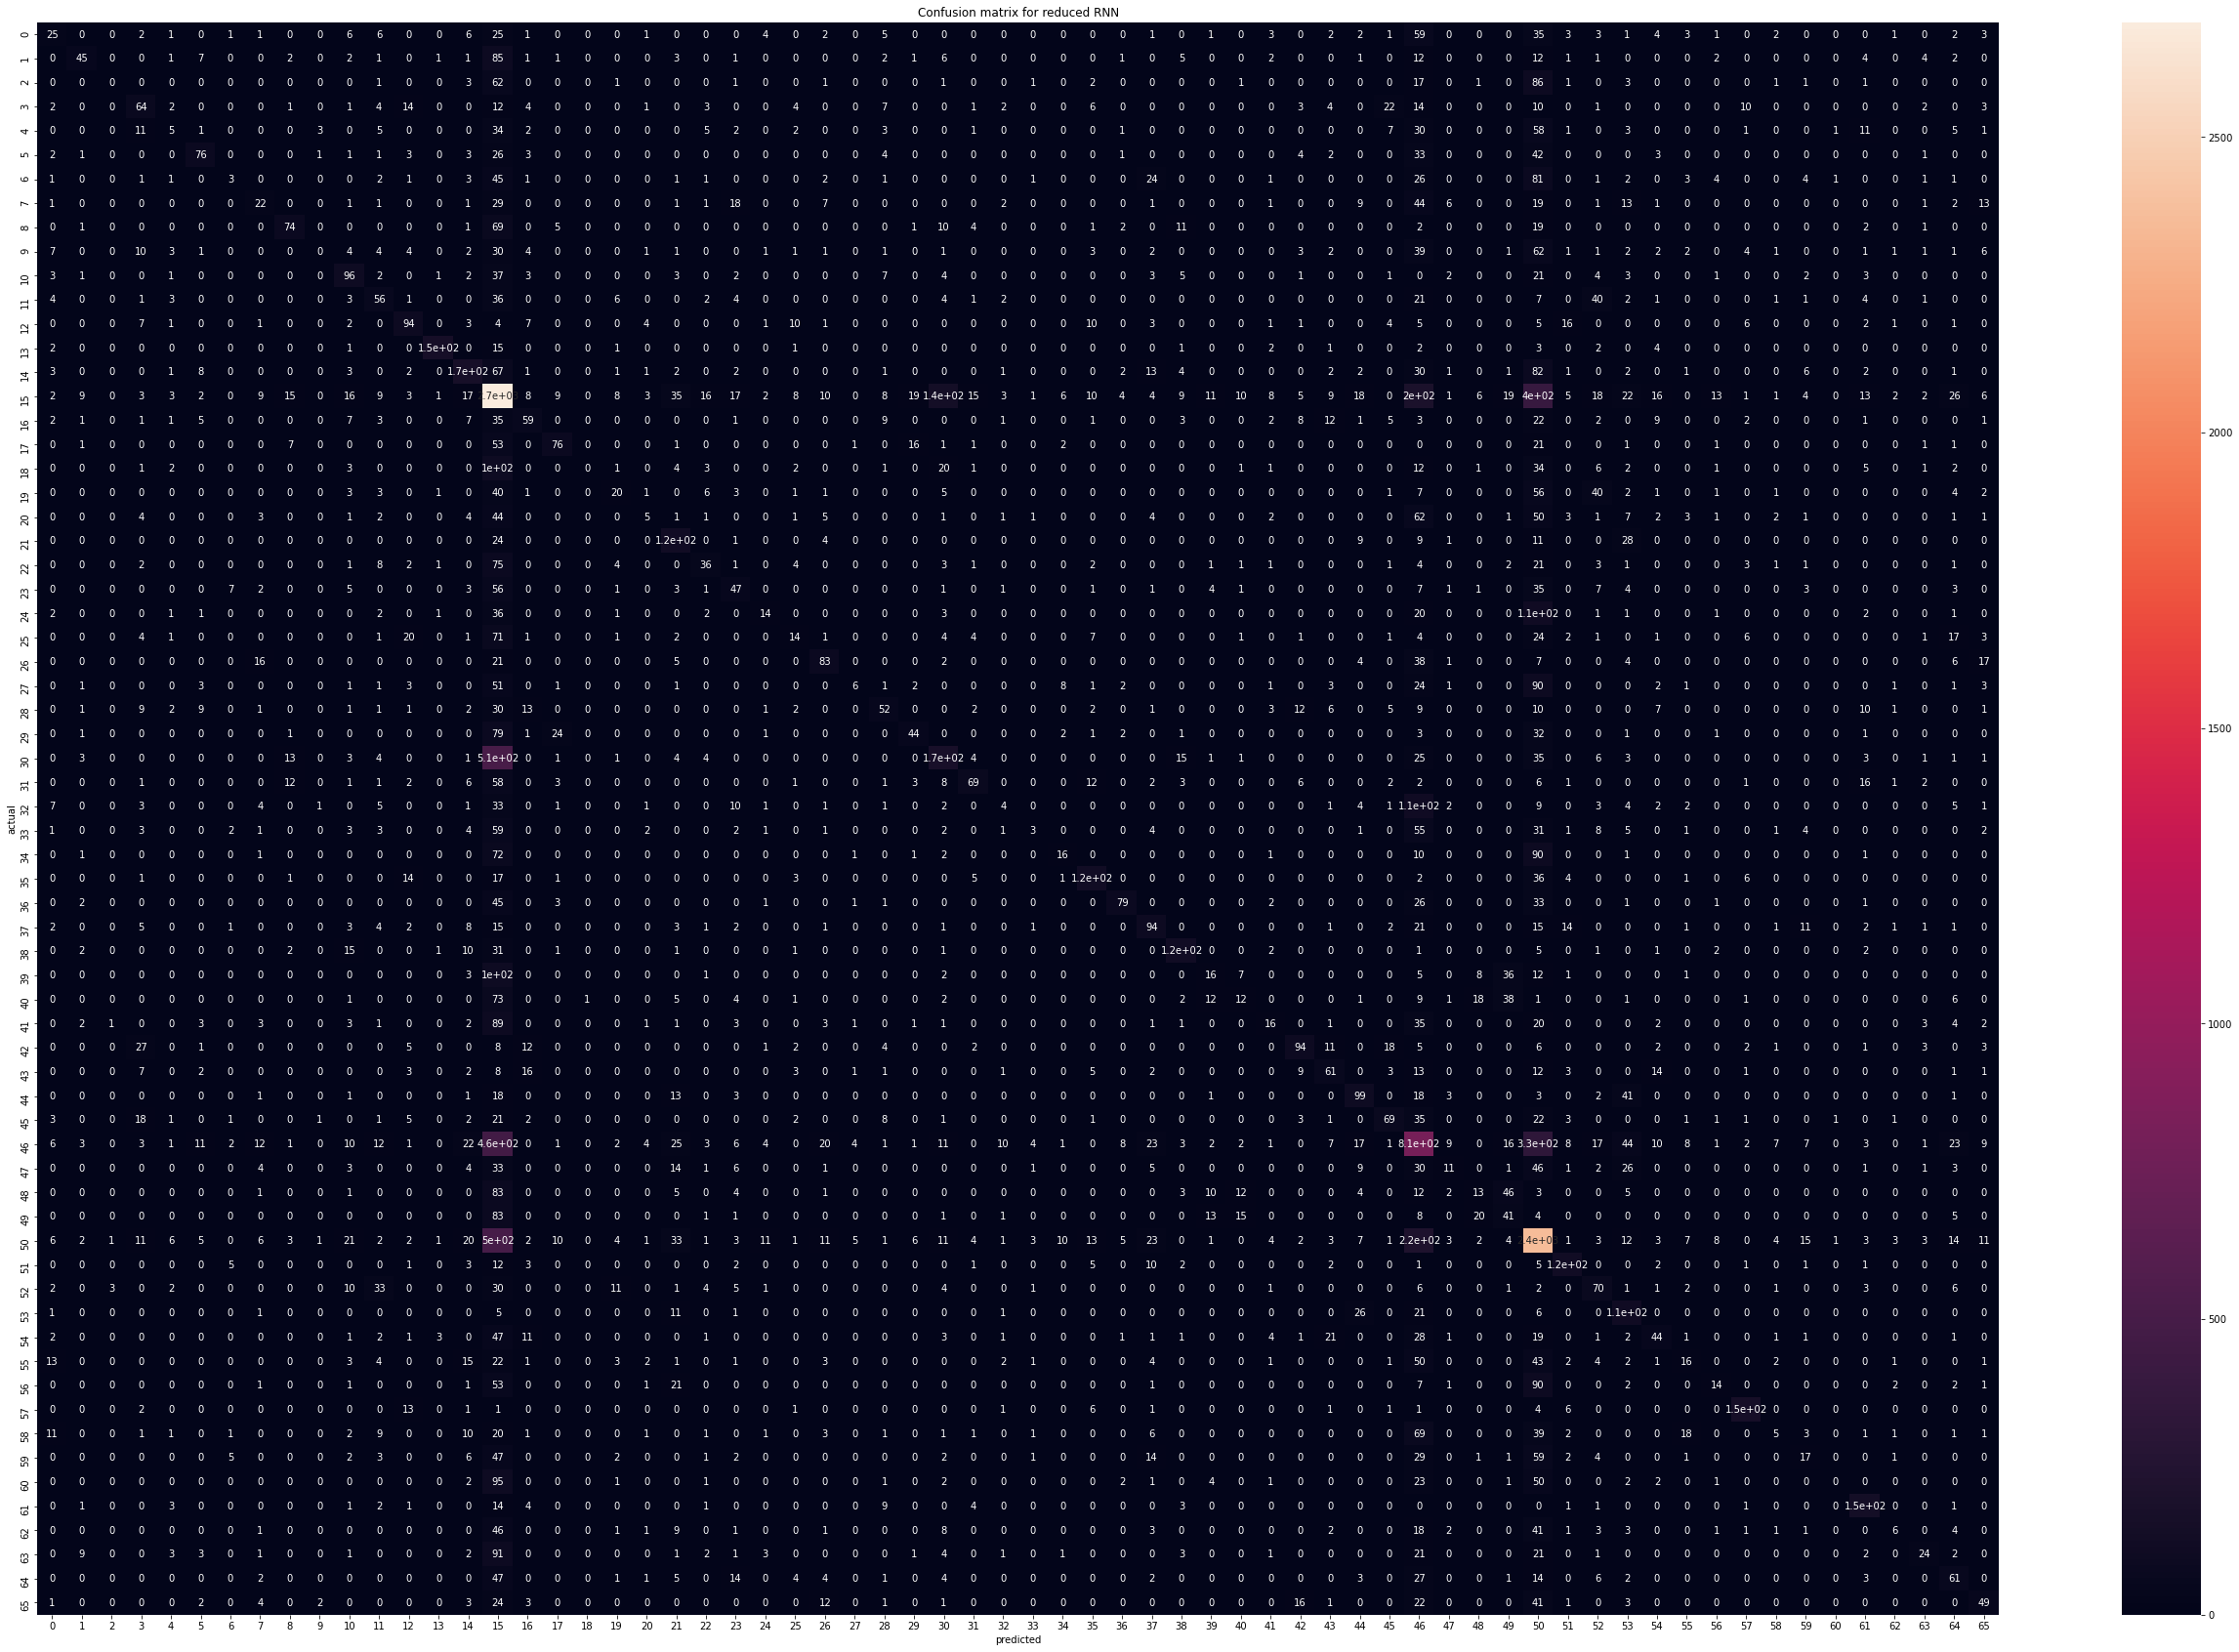

In [26]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
plt.figure(figsize=(45,30))
sns.heatmap(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)),annot=True)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion matrix for reduced RNN')
plt.savefig('reduced_rnn_conf_matrix.png')
plt.show()

In [27]:
model.save('reducedRNNnet')

INFO:tensorflow:Assets written to: reducedRNNnet\assets


INFO:tensorflow:Assets written to: reducedRNNnet\assets
